# Cities in Motion: Student Hackathon

This notebook covers initial data exploration of the Urban Scanner dataset.

In [1]:
import os
os.chdir("..")

from pandas import DataFrame
from geopandas import GeoDataFrame
import pandas as pd
import numpy as np

from data import *
from preprocess import *

from postprocess import load_training_history, plot_training_results, plot_concentration_wind_predictions
from run import load_loader

run_dir = "run/model-2025-10-16_09-11"

history = load_training_history(run_dir)

Loaded training history from: run/model-2025-10-16_09-11/training_history.pt


In [2]:
r3_df = read_r3()
r3_df["Timestamp"] = pd.to_datetime(r3_df["Timestamp"])
r3_df["date"] = r3_df.Timestamp.dt.date

r3_df.groupby("date")["date"].count().sort_values(ascending=False)

date
2021-05-22    2959
2021-06-15    2408
2021-06-09    2312
2021-05-29    2092
2021-05-13    1765
2021-06-04    1593
2021-04-13    1508
2021-06-11    1480
2021-04-18    1462
2021-04-26    1450
2021-06-23    1449
2021-06-17    1396
2021-06-10    1380
2021-06-16    1372
2021-05-05    1322
2021-04-16    1317
2021-06-05    1285
2021-04-22    1273
2021-06-18    1258
2021-06-14    1253
2021-04-07    1225
2021-05-14    1215
2021-06-12    1212
2021-04-24    1196
2021-06-07    1173
2021-05-03    1172
2021-04-30    1124
2021-05-15    1078
2021-06-01    1025
2021-05-20     987
2021-05-09     985
2021-05-04     984
2021-06-02     875
2021-07-30     796
2021-08-01     760
2021-08-02     732
2021-08-03     726
2021-06-21     696
2021-06-29     445
2021-06-24     383
2021-05-08     339
2021-05-16     336
2021-04-20     332
2021-04-14     330
2021-04-23     330
2021-05-12     330
2021-05-23     330
2021-05-18     329
2021-04-28     328
2021-05-24     327
2021-05-19     326
2021-05-21     325
2021-05

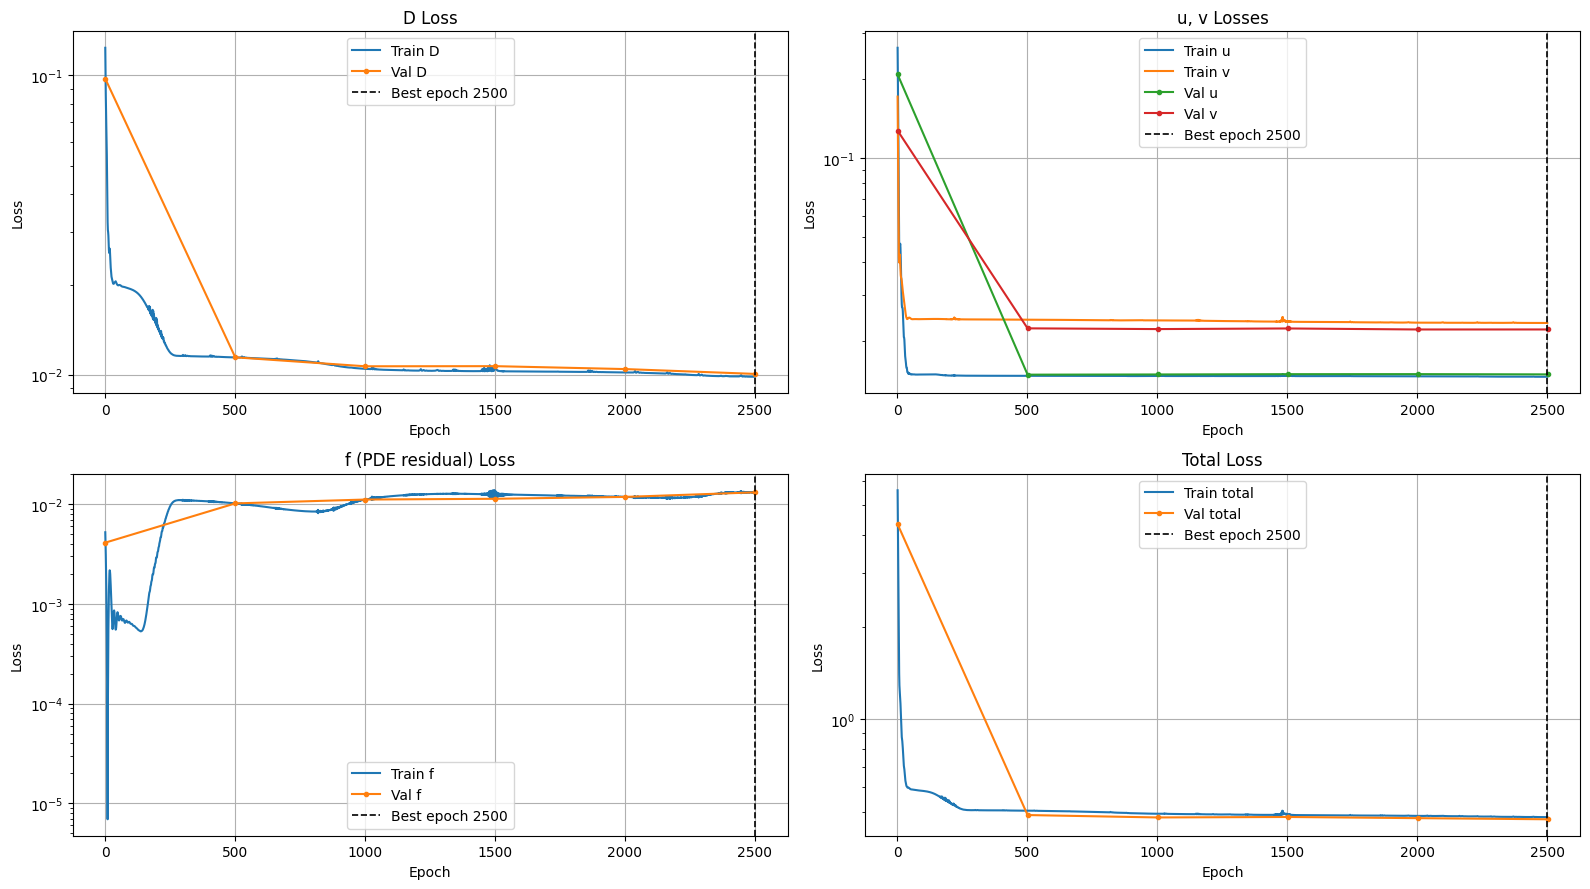

In [3]:
plot_training_results(history, 2500, 500)

Loaded test predictions from: run/model-2025-10-16_09-11/test_predictions.pt
Contents:
  D_true         : tensor (1479, 1)
  u_true         : tensor (1479, 1)
  v_true         : tensor (1479, 1)
  D_pred         : tensor (1479, 1)
  u_pred         : tensor (1479, 1)
  v_pred         : tensor (1479, 1)
=== Pollution Data Summary ===
Total rows: 2,957
Columns: ['r3_key', 'x_meter', 'y_meter', 'hour', 'NO2', 'wind_x', 'wind_y', 'S']

Feature ranges (original scale):
  x_meter    min=293725.476  max=335018.683  mean=313422.626
  y_meter    min=4827214.793  max=4856777.060  mean=4842647.635
  hour       min=     9.467  max=    19.017  mean=    12.102
  NO2        min=     0.001  max=     0.068  mean=     0.022
  wind_x     min=   -26.531  max=    26.750  mean=    -2.050
  wind_y     min=   -30.736  max=    30.390  mean=    -2.164
  S          min=     0.000  max=     0.000  mean=     0.000

Preprocessed:
  Train samples: 1,478
  Test samples:  1,479
  Collocation pts: 10,000
  Scaling: on
 

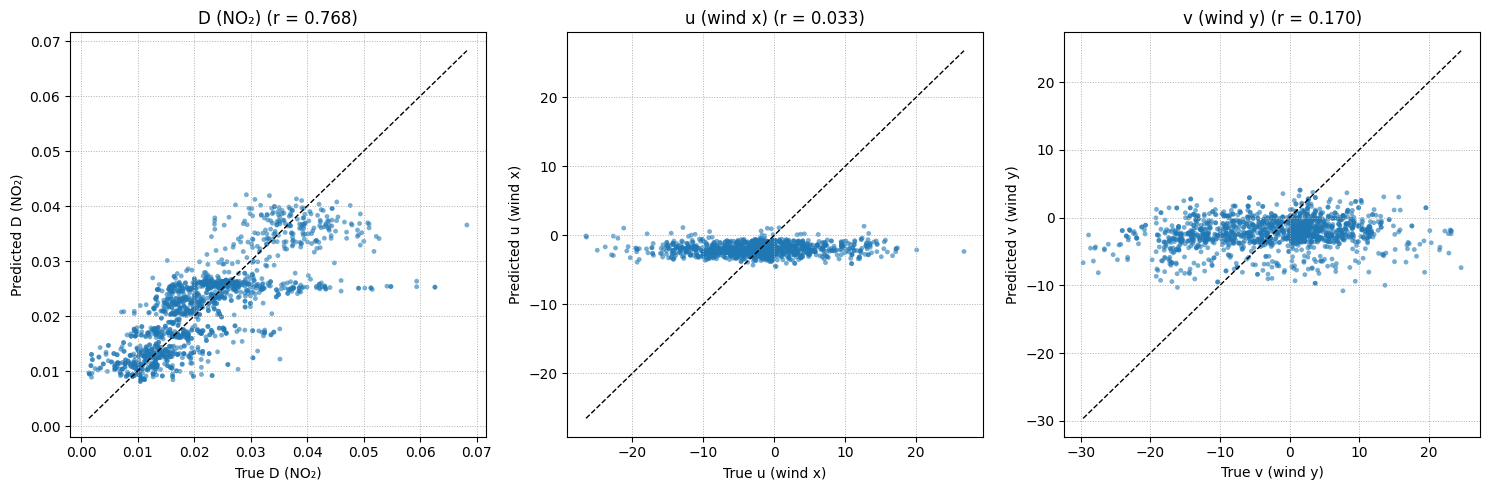

In [4]:
plot_concentration_wind_predictions(run_dir, n_colloc=10000)

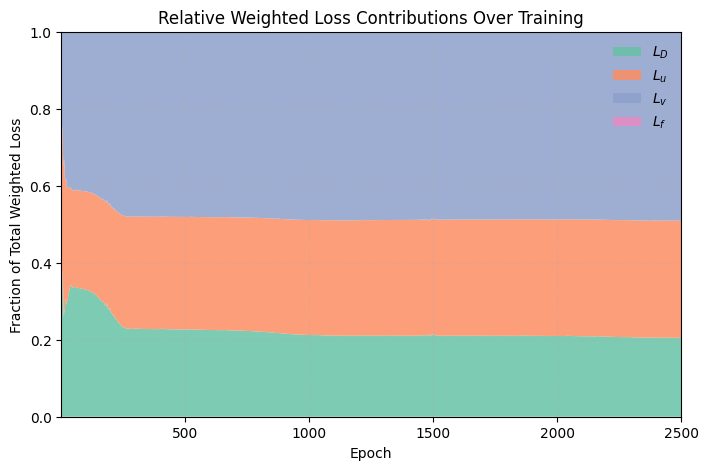

In [5]:
import matplotlib.pyplot as plt

def plot_loss_contributions(history, save_path=None, show=True):
    """
    Plot the relative weighted contribution of each loss component per epoch.

    Args:
        history (dict): Training history containing "contrib_D", "contrib_u", "contrib_v", "contrib_f".
        save_path (str, optional): Path to save the figure (e.g., 'plots/contribs.png').
        show (bool): Whether to display the plot interactively.
    """

    # --- Safety check ---
    required_keys = ["contrib_D", "contrib_u", "contrib_v", "contrib_f"]
    if not all(k in history for k in required_keys):
        raise ValueError(f"History must contain {required_keys} to plot loss contributions.")

    epochs = np.arange(1, len(history["contrib_D"]) + 1)

    contribs = np.array([
        history["contrib_D"],
        history["contrib_u"],
        history["contrib_v"],
        history["contrib_f"],
    ])

    labels = [r"$L_D$", r"$L_u$", r"$L_v$", r"$L_f$"]
    colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"]

    plt.figure(figsize=(8, 5))
    plt.stackplot(epochs, contribs, labels=labels, colors=colors, alpha=0.85)
    plt.legend(loc="upper right", frameon=False)
    plt.title("Relative Weighted Loss Contributions Over Training")
    plt.xlabel("Epoch")
    plt.ylabel("Fraction of Total Weighted Loss")
    plt.xlim(1, len(epochs))
    plt.ylim(0, 1)
    plt.grid(alpha=0.3, linestyle="--")

    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)

    if show:
        plt.show()
    else:
        plt.close()


plot_loss_contributions(history)